<a href="https://colab.research.google.com/github/Asma-Ahmed-Aqil-AL-Zubaidi/Bonus_Exercise/blob/main/Perceptron_Exercise_week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron Model with Iris Dataset


This notebook to train on how to build and train a Perceptron model using the Iris dataset. The Iris dataset is a classic dataset used in machine learning and statistics, consisting of 150 samples of iris flowers with four features each (sepal length, sepal width, petal length, and petal width) and three classes (Iris-setosa, Iris-versicolor, and Iris-virginica).

In this notebook, we will do the following:
* Load and prepare the Iris dataset.
* Split the dataset into training and testing sets.
* Standardize the features.
* Train a Perceptron model.
* Evaluate the model's performance.


# Import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
SEED=42

In [ ]:
datasets=load_iris()

In [ ]:
datasets.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
X = datasets.data
y = datasets.target

In [ ]:
df = pd.DataFrame(data=np.c_[X, y], columns=datasets.feature_names + ['target'])
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


# EDA

In [ ]:
#plt.imshow(datasets.images[0])

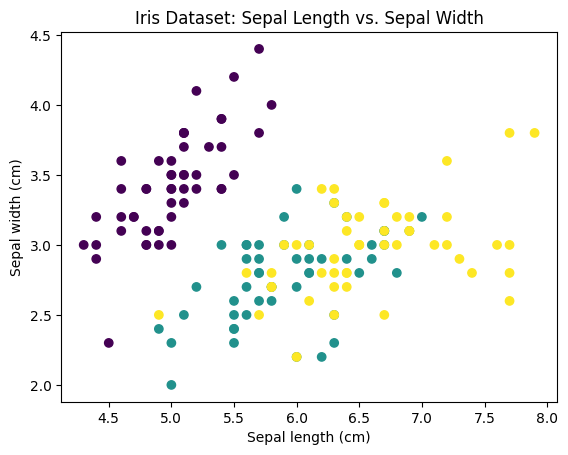

In [ ]:
plt.scatter(datasets.data[:, 0], datasets.data[:, 1], c=datasets.target)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Iris Dataset: Sepal Length vs. Sepal Width')
plt.show()

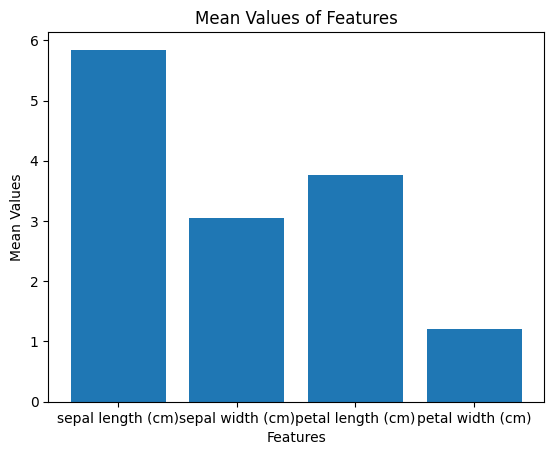

In [ ]:
plt.bar(datasets.feature_names, datasets.data.mean(axis=0))
plt.xlabel('Features')
plt.ylabel('Mean Values')
plt.title('Mean Values of Features')
plt.show()

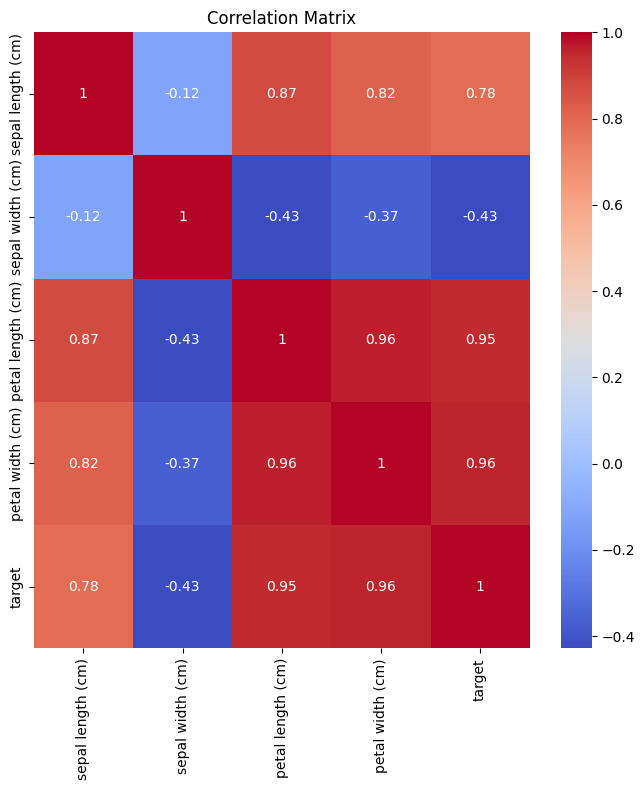

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Split the dataset into training and testing sets

In [ ]:
X=df.drop('target',axis=1)
y=df['target']

In [ ]:
X_train_val , X_test , y_train_val , y_test = train_test_split(X,y,test_size=0.2,random_state=SEED)
X_train , X_val , y_train , y_val = train_test_split(X_train_val,y_train_val,test_size=0.2,random_state=SEED)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 138 to 37
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  96 non-null     float64
 1   sepal width (cm)   96 non-null     float64
 2   petal length (cm)  96 non-null     float64
 3   petal width (cm)   96 non-null     float64
dtypes: float64(4)
memory usage: 3.8 KB


# Standardize the features

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

# Initialize and train the Perceptron model

In [ ]:
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

perceptron.fit(X_train, y_train)

Perceptron(random_state=42)

# Predict the labels of the test set

In [ ]:
y_pred = perceptron.predict(X_test)

# Calculate the accuracy of the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 70.00%


# Display the first few predictions

In [ ]:
print("First few predictions:", y_pred[:5])

First few predictions: [1. 0. 2. 1. 1.]
